In [2045]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.layers import Activation, Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPool2D
%matplotlib inline

In [2046]:
 df = pd.read_csv('Placement_Data_Full_Class.csv')

In [2047]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [2048]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [2049]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [2050]:
df['gender'].unique()

/usr/local/lib/python3.6/dist-packages/IPython/core/displayhook.py:260: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


array(['M', 'F'], dtype=object)

In [2051]:
df['ssc_b'].unique()

array(['Others', 'Central'], dtype=object)

In [2052]:
df['hsc_s'].unique()

array(['Commerce', 'Science', 'Arts'], dtype=object)

In [2053]:
df['degree_t'].unique()

array(['Sci&Tech', 'Comm&Mgmt', 'Others'], dtype=object)

In [2054]:
df['workex'].unique()

array(['No', 'Yes'], dtype=object)

In [2055]:
df['specialisation'].unique()

array(['Mkt&HR', 'Mkt&Fin'], dtype=object)

In [2056]:
df.drop(['sl_no','salary','hsc_b','ssc_b','hsc_s'],axis=1,inplace=True)

In [2057]:
cat_feats = df.select_dtypes(exclude=[np.number]).columns

In [2058]:
cat_feats

Index(['gender', 'degree_t', 'workex', 'specialisation', 'status'], dtype='object')

In [2059]:
dataset= pd.get_dummies(df,columns=cat_feats,drop_first=True)

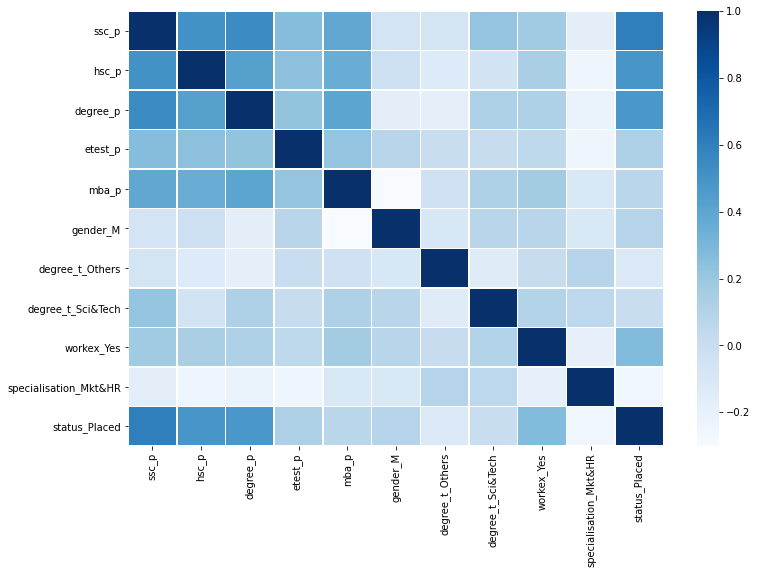

In [2060]:
corr = dataset.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr,cmap='Blues',lw=0.5)

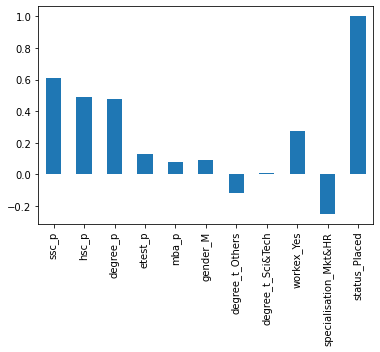

In [2061]:
corr['status_Placed'].plot(kind="bar")

In [2062]:
print ('TOP 5 important features which impact the placements:\n',corr['status_Placed'].sort_values(ascending=False)[1:], '\n')

TOP 5 important features which impact the placements:
 ssc_p                    0.607889
hsc_p                    0.491228
degree_p                 0.479861
workex_Yes               0.276060
etest_p                  0.127639
gender_M                 0.090670
mba_p                    0.076922
degree_t_Sci&Tech        0.008688
degree_t_Others         -0.117232
specialisation_Mkt&HR   -0.250655
Name: status_Placed, dtype: float64 



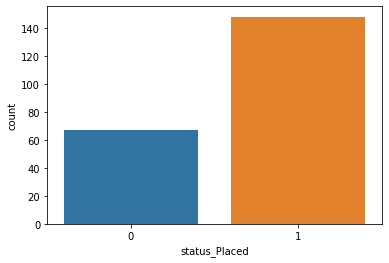

In [2063]:
sns.countplot(dataset['status_Placed'])

In [2064]:
labels=dataset.columns[:-1]
labels

Index(['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'gender_M',
       'degree_t_Others', 'degree_t_Sci&Tech', 'workex_Yes',
       'specialisation_Mkt&HR'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


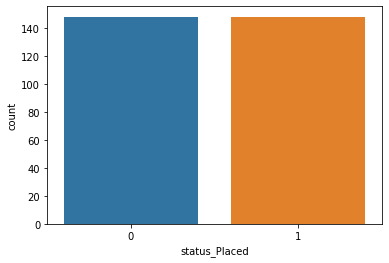

In [2065]:
smote = SMOTE(ratio='minority', n_jobs=-1)
X_sm, y_sm = smote.fit_resample(dataset[labels], dataset['status_Placed'])

dataset = pd.DataFrame(X_sm, columns=labels)
dataset['status_Placed'] = y_sm

sns.countplot(dataset['status_Placed'])

In [2066]:
dataset

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_M,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR,status_Placed
0,67.000000,91.000000,58.000000,55.000000,58.800000,1.0,0.000000,1.000000,0.000000,1.000000,1
1,79.330000,78.330000,77.480000,86.500000,66.280000,1.0,0.000000,1.000000,1.000000,0.000000,1
2,65.000000,68.000000,64.000000,75.000000,57.800000,1.0,0.000000,0.000000,0.000000,0.000000,1
3,56.000000,52.000000,52.000000,66.000000,59.430000,1.0,0.000000,1.000000,0.000000,1.000000,0
4,85.800000,73.600000,73.300000,96.800000,55.500000,1.0,0.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...
291,52.505397,54.265572,50.817406,74.842364,64.556956,0.0,0.000000,0.128626,0.871374,0.128626,0
292,60.569909,49.383485,55.958712,75.404129,57.414989,1.0,0.595871,0.000000,0.000000,1.000000,0
293,52.000000,50.269572,60.746602,59.946086,58.855348,1.0,0.000000,0.000000,0.000000,0.000000,0
294,56.450223,50.451469,57.072146,57.543606,61.816295,1.0,0.000000,0.000000,0.000000,0.862867,0


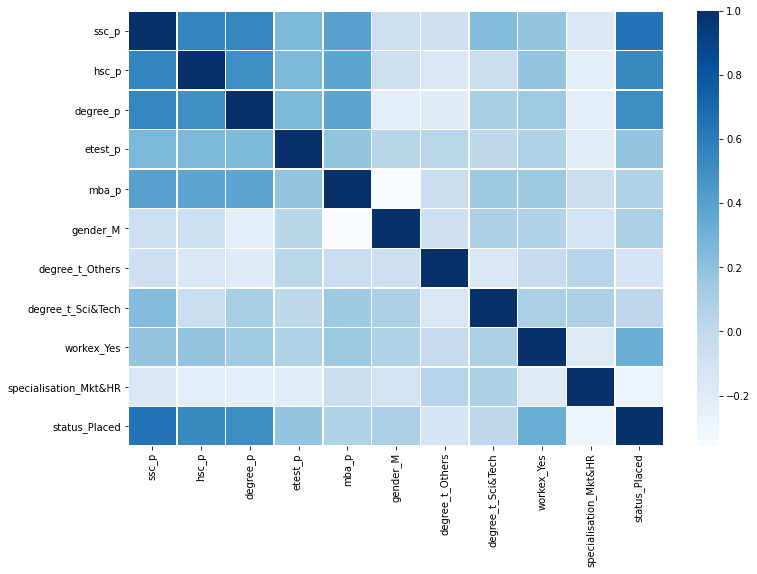

In [2067]:
corr = dataset.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr,cmap='Blues',lw=0.5)

In [2068]:
print ('TOP 5 important features which impact the placements:\n',corr['status_Placed'].sort_values(ascending=False)[1:], '\n') #top 5 values
#print (corr['status_Placed'].sort_values(ascending=False)[-5:], '\n') #bottom 5 values

TOP 5 important features which impact the placements:
 ssc_p                    0.648234
hsc_p                    0.529057
degree_p                 0.515104
workex_Yes               0.322674
etest_p                  0.188487
gender_M                 0.094775
mba_p                    0.072619
degree_t_Sci&Tech        0.009760
degree_t_Others         -0.114411
specialisation_Mkt&HR   -0.276191
Name: status_Placed, dtype: float64 



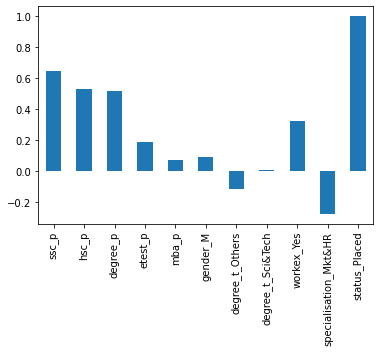

In [2069]:
corr['status_Placed'].plot(kind="bar")

In [2070]:

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [2071]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [2072]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [2073]:
print(sc.mean_)
a = sc.mean_
b = a.tolist()
print(b)

[6.50624176e+01 6.39457821e+01 6.51712321e+01 7.11869763e+01
 6.22426257e+01 6.20932842e-01 6.31238627e-02 2.59694073e-01
 2.95915895e-01 4.70969511e-01]
[65.06241757870305, 63.945782073372726, 65.17123207320799, 71.18697625411792, 62.24262568008868, 0.6209328424285236, 0.06312386273820458, 0.259694072529648, 0.29591589546182756, 0.47096951055920416]


In [2074]:
print(sc.var_)

[1.25048646e+02 1.15849428e+02 5.45738909e+01 1.51918881e+02
 3.44628085e+01 2.22280369e-01 4.99078813e-02 1.79956802e-01
 1.94197266e-01 2.30356312e-01]


In [2075]:
print(sc.scale_)
a = sc.scale_
b = a.tolist()
print(b)

[11.18251519 10.76333722  7.38741435 12.32553775  5.87050326  0.47146619
  0.22340072  0.42421316  0.44067819  0.47995449]
[11.182515186539758, 10.763337217557854, 7.3874143549037345, 12.325537745733184, 5.870503259378299, 0.471466190249285, 0.223400719030457, 0.4242131557416943, 0.44067818921818, 0.47995448975197225]


In [2076]:
ann = tf.keras.models.Sequential()

In [2077]:
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))
ann.add(Dropout(0.3))

In [2078]:
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))
ann.add(Dropout(0.3))

In [2079]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [2080]:
ann.compile(optimizer = Adam(learning_rate=0.01), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [2081]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)

In [2082]:
ann.fit(X_train, y_train, batch_size = 10,validation_data = (X_test,y_test), epochs = 200,callbacks=[early_stop])

Epoch 1/200
24/24 [==============================] - 0s 6ms/step - loss: 0.7199 - accuracy: 0.5212 - val_loss: 0.5934 - val_accuracy: 0.7333
Epoch 2/200
24/24 [==============================] - 0s 2ms/step - loss: 0.5495 - accuracy: 0.7331 - val_loss: 0.4829 - val_accuracy: 0.8167
Epoch 3/200
24/24 [==============================] - 0s 2ms/step - loss: 0.4080 - accuracy: 0.7966 - val_loss: 0.4216 - val_accuracy: 0.7167
Epoch 4/200
24/24 [==============================] - 0s 2ms/step - loss: 0.4026 - accuracy: 0.8051 - val_loss: 0.3698 - val_accuracy: 0.8000
Epoch 5/200
24/24 [==============================] - 0s 2ms/step - loss: 0.3477 - accuracy: 0.8136 - val_loss: 0.3471 - val_accuracy: 0.8000
Epoch 6/200
24/24 [==============================] - 0s 2ms/step - loss: 0.3172 - accuracy: 0.8517 - val_loss: 0.2976 - val_accuracy: 0.9000
Epoch 7/200
24/24 [==============================] - 0s 2ms/step - loss: 0.3247 - accuracy: 0.8517 - val_loss: 0.3273 - val_accuracy: 0.8667
Epoch 8/200
2

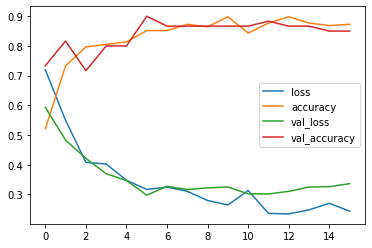

In [2083]:
loss = pd.DataFrame(ann.history.history)
loss.plot()


In [2084]:
#np.round(ann.predict(sc.transform([[67.000000,	91.000000,	58.000000,	55.000000,	58.800000,	1.000000,	1.0,	1.000000,	1.000000,	0.000000,	0.0,	1.000000,	0.000000,	1.000000]])))

In [2085]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]]


In [2086]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print(classification_report(y_test,y_pred))

[[28  5]
 [ 4 23]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.86        33
           1       0.82      0.85      0.84        27

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



# **Logistic Regression**

In [2087]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C= 0.5, penalty= 'l2', solver= 'lbfgs')
classifier.fit(X_train, y_train)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [2088]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[32  1]
 [ 3 24]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        33
           1       0.96      0.89      0.92        27

    accuracy                           0.93        60
   macro avg       0.94      0.93      0.93        60
weighted avg       0.93      0.93      0.93        60



In [2089]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 87.30 %
Standard Deviation: 6.29 %


In [2090]:
parameters = [{'C': [0.01,0.25, 0.5, 0.75, 1,10],'penalty': ['l2','none'],
               'solver':['lbfgs']},
              {'C': [0.01,0.25, 0.5, 0.75, 1,10],'penalty': ['l1'],
               'solver':['liblinear']}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and

Best Accuracy: 87.83 %
Best Parameters: {'C': 0.25, 'penalty': 'l1', 'solver': 'liblinear'}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and

In [2091]:
classifier.coef_.shape

(1, 10)

In [2092]:
dataset.columns[:-1].shape

(10,)

In [2093]:
coeffecients = pd.DataFrame(classifier.coef_.reshape((10,1)),dataset.columns[:-1])
coeffecients.columns = ['Coeffecient']
coeffecients.sort_values('Coeffecient',ascending=False)

,Coeffecient
ssc_p,1.970537
degree_p,1.059515
workex_Yes,0.870997
hsc_p,0.711197
gender_M,0.419413
etest_p,0.016793
degree_t_Others,-0.001909
specialisation_Mkt&HR,-0.215403
degree_t_Sci&Tech,-0.525984
mba_p,-0.828515


In [2094]:
classifier.intercept_

array([0.27535058])

# **Random Forest Classification**

In [2095]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion = 'entropy')
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [2096]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[31  2]
 [ 5 22]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        33
           1       0.92      0.81      0.86        27

    accuracy                           0.88        60
   macro avg       0.89      0.88      0.88        60
weighted avg       0.89      0.88      0.88        60



In [2097]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 88.15 %
Standard Deviation: 3.90 %


from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

# **Conclusion**




Since the dataset is small, the there is a noticeable change in accuracy of the algorithms everytime we run the program.
In such a such case it is better to run all the algorithms considerable no.of.times (say 10 times) and find the mean accuracy of all the models.
Also cosider the accuracy range while choosing the best fit algorithm for your dataset. 

In my program i found Logistic regression and Kernel SVM classification as a best model to this dataset.
